This is an exploration of a dataset of halloween candy survey data. The data was gathered by David Ng at The University of British Columbia, and originally published in The Science Creative Quarterly.

This data and analysis would be useful for a candy company to learn where to direct marketing and new product innovation. Finding combinations of which age, gender, and national origin prefer which product is very useful towards developing new strategies.

The Survey data was noisy, as it was filled out by people on the internet. People would write in everything from "murika" to "Trumpistan" for their home country, and ages also had some unusable responses. I reclassified using a combination of checking the values of the write-in responses, and natural language to rectify misspellings. 

The majority of the data was a candy name and a rating by the survey participant: "Joy," "Despair," or "Meh." I converted these to numerical rankings. There was a lot of missing data here as well. Not a single participant filled out every candy row. I filtered out rows where people didn't fill out any candy data, and converted nan's to 0s where necessary for analysis.

The other noisy variable were 2 write ins: "Joy Other" and "Despair Other," which were write-in categories for people to list other candies that they loved or hated, respectively. I looked at the most used words to find which other candies were mentioned but not in the list, and then added those as columns if they had enough mentions in either category.

Additionaly, some of the variables used were in the "just for fun" category. If we're really interested in a study of candy popularity, vicodin and physical hugs should not be on the list, so these categories were excised. Additionally, there were different categories for multiple colors of M&Ms, which would have skewed the chocolate data. A comparison of favorite M&M colors (do they count as flavors?) is outside the scope of this project. 

Candies are grouped into 3 different categories: Chocolate, Fruit, and Other. Chocolate is any candy which has chocolate in it, Fruit includes fruit flavored candies, and other is for everything else -  toffee, peanut butter, or black licorice. Categorizing the candies involved checking ingredients on wikipedia. I'm including anything with chocolate in it as a chocolate candy, except for a Tootsie Pop, which could be classified as either Fruit or Chocolate. Since the majority of the experience of eating a Tootsie Pop is fruit flavored, I categorized it accordingly.



Survey: https://www.scq.ubc.ca/wp-content/uploads/2017/10/candyhierarchysurvey2017.pdf
Data Source: https://www.scq.ubc.ca/so-much-candy-data-seriously/

Import libraries and load dataframe

In [63]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('gazetteers')
nltk.download('stopwords')

le = LabelEncoder()

candy = pd.read_excel('candyhierarchy2017.xls')
pd.set_option('display.max_columns', None)
candy.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iokee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\iokee\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\iokee\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\iokee\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package gazetteers to
[nltk_data]     C:\Users\iokee\AppData\Roaming\nltk_data...
[nltk_data]   Package gazetteers is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iokee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is alrea

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

Rename columns to remove question number. Make them title case. Also drop unnecessary columns

In [64]:
candy = candy.loc[:, 'Q2: GENDER':'Q9: OTHER COMMENTS']


candy.rename(columns=lambda x: x[4:], inplace=True)
candy.rename(columns=lambda x: x.strip(), inplace=True)
candy.columns = [col.title() for col in candy.columns]
candy.drop("State, Province, County, Etc", axis=1, inplace=True)
candy.head()

,Gender,Age,Country,100 Grand Bar,Anonymous Brown Globs That Come In Black And Orange Wrappers\t(A.K.A. Mary Janes),Any Full-Sized Candy Bar,Black Jacks,Bonkers (The Candy),Bonkers (The Board Game),Bottle Caps,Box'O'Raisins,Broken Glow Stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy That Is Clearly Just The Stuff Given Out For Free At Restaurants,Caramellos,"Cash, Or Other Forms Of Legal Tender",Chardonnay,Chick-O-Sticks (We Don’T Know What That Is),Chiclets,Coffee Crisp,Creepy Religious Comics/Chick Tracts,Dental Paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow Sticks,Goo Goo Clusters,Good N' Plenty,Gum From Baseball Cards,Gummy Bears Straight Up,Hard Candy,Healthy Fruit,Heath Bar,Hershey'S Dark Chocolate,Hershey’S Milk Chocolate,Hershey'S Kisses,Hugs (Actual Physical Hugs),Jolly Rancher (Bad Flavor),Jolly Ranchers (Good Flavor),Joyjoy (Mit Iodine!),Junior Mints,Senior Mints,Kale Smoothie,Kinder Happy Hippo,Kit Kat,Laffytaffy,Lemonheads,Licorice (Not Black),Licorice (Yes Black),Lindt Truffle,Lollipops,Mars,Maynards,Mike And Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’S,Blue M&M'S,Red M&M'S,Green Party M&M'S,Independent M&M'S,Abstained From M&M'Ing.,Minibags Of Chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'N'Laters,Peeps,Pencils,Pixy Stix,Real Housewives Of Orange County Season 9 Blue-Ray,Reese’S Peanut Butter Cups,Reese'S Pieces,Reggie Jackson Bar,Rolos,Sandwich-Sized Bags Filled With Booberry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (I.E. Abominations Of Nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (A Friend To Diabetes),Take 5,Tic Tacs,Those Odd Marshmallow Circus Peanut Things,Three Musketeers,Tolberone Something Or Other,Trail Mix,Twix,"Vials Of Pure High Fructose Corn Syrup, For Main-Lining Into Your Vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat Anything,York Peppermint Patties,Joy Other,Despair Other,Other Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,44,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...
2,Male,49,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,40,us,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESP

There are a lot of candy columns here, some of which are not even candies. We'll focus on the real candies here and not vague categories, like "full sized candy bars", or silly categories, like "Broken Glow Stick." We'll also remove the fun but unnecessary comments.

In [65]:
remove_cols = [
    "Any Full-Sized Candy Bar",
    "Bonkers (The Board Game)",
    "Box'O'Raisins",
    "Broken Glow Stick",
    "Candy That Is Clearly Just The Stuff Given Out For Free At Restaurants",
    "Cash, Or Other Forms Of Legal Tender",
    "Chardonnay",
    "Creepy Religious Comics/Chick Tracts",
    "Dental Paraphenalia",
    "Dove Bars",
    "Generic Brand Acetaminophen",
    "Glow Sticks",
    "Healthy Fruit",
    "Hugs (Actual Physical Hugs)",
    "Joyjoy (Mit Iodine!)",
    "Senior Mints",
    "Kale Smoothie",
    "Blue M&M'S",
    "Red M&M'S",
    "Green Party M&M'S",
    "Independent M&M'S",
    "Abstained From M&M'Ing.",
    "Minibags Of Chips",
    "Pencils",
    "Real Housewives Of Orange County Season 9 Blue-Ray",
    "Sandwich-Sized Bags Filled With Booberry Crunch",
    "Spotted Dick",
    "Sweetums (A Friend To Diabetes)",
    "Vials Of Pure High Fructose Corn Syrup, For Main-Lining Into Your Vein",
    "Trail Mix",
    "Vicodin",
    "Whole Wheat Anything",
    "White Bread"
]
candy.drop(columns=remove_cols, inplace=True)
repl_cols = {
    "Anonymous Brown Globs That Come In Black And Orange Wrappers\t(A.K.A. Mary Janes)": "Mary Janes",
    "Bonkers (The Candy)": "Bonkers",
    "Chick-O-Sticks (We Don’T Know What That Is)": "Chick-O-Sticks",
    "Gummy Bears Straight Up": "Gummy Bears",
    "Jolly Rancher (Bad Flavor)": "Jolly Ranchers (Bad Flavor)",
    "Licorice (Not Black)": "Licorice",
    "Licorice (Yes Black)": "Black Licorice",
    "Reese’S Peanut Butter Cups": "Reese's Peanut Butter Cups",
    "Reese'S Pieces": "Reese's Pieces",
    "Sourpatch Kids (I.E. Abominations Of Nature)": "Sourpatch Kids",
    "Those Odd Marshmallow Circus Peanut Things": "Circus Peanuts",
    "Tolberone Something Or Other": "Toblerone"
}
candy.rename(columns=repl_cols, inplace=True)

Look at the candy rating values

In [66]:
print(candy['100 Grand Bar'].unique())

[nan 'MEH' 'JOY' 'DESPAIR']


Remove people who didn't fill out answers for any candy, and replace answer values with numerical values

In [67]:
candy.dropna(subset=candy.loc[:, '100 Grand Bar':'York Peppermint Patties'].columns, how='all', inplace=True)
candy.replace({'DESPAIR': 0, 'MEH': 1, 'JOY': 2}, inplace = True)
candy['Country'] = candy['Country'].astype(str)
candy['Joy Other'] = candy['Joy Other'].astype(str)
candy['Despair Other'] = candy['Despair Other'].astype(str)
candy['Other Comments'] = candy['Other Comments'].astype(str)
candy.head()

,Gender,Age,Country,100 Grand Bar,Mary Janes,Black Jacks,Bonkers,Bottle Caps,Butterfinger,Cadbury Creme Eggs,Candy Corn,Caramellos,Chick-O-Sticks,Chiclets,Coffee Crisp,Dots,Fuzzy Peaches,Goo Goo Clusters,Good N' Plenty,Gum From Baseball Cards,Gummy Bears,Hard Candy,Heath Bar,Hershey'S Dark Chocolate,Hershey’S Milk Chocolate,Hershey'S Kisses,Jolly Ranchers (Bad Flavor),Jolly Ranchers (Good Flavor),Junior Mints,Kinder Happy Hippo,Kit Kat,Laffytaffy,Lemonheads,Licorice,Black Licorice,Lindt Truffle,Lollipops,Mars,Maynards,Mike And Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’S,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'N'Laters,Peeps,Pixy Stix,Reese's Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Starburst,Sweet Tarts,Swedish Fish,Take 5,Tic Tacs,Circus Peanuts,Three Musketeers,Toblerone,Twix,Whatchamacallit Bars,York Peppermint Patties,Joy Other,Despair Other,Other Comments
1,Male,44,USA,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,Mounds,nan,Bottom line is Twix is really the only candy w...
3,Male,40,us,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,1.0,1.0,0.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,"Reese's crispy crunchy bars, 5th avenue bars, ...",nan,Raisins can go to hell
4,Male,23,usa,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,NaN,1.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,nan,nan,nan
5,Male,NaN,nan,2.0,0.0,NaN,NaN,1.0,2.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,NaN,2.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,NaN,1.0,0.0,2.0,2.0,2.0,2.0,2.0,nan,nan,nan
7,Male,33,canada,2.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,NaN,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,using my elbows to get in front of the little ...,when the little kids get the big chocolate bar...,"first person to give out cans of beer, wins"


Let's see the countries now.

In [68]:
candy['Country'].unique()

array(['USA ', 'us', 'usa', 'nan', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'USA', 'uk', 'United States', 'united states', 'Usa',
       'United staes', 'United Kingdom', 'United States of America',
       'UAE', 'United States ', 'England', 'canada ', 'United states',
       'u.s.a.', 'USAUSAUSA', 'america', 'france',
       'United States of America ', 'U.S.A.', 'Mexico', 'Canada ',
       'united states of america', 'US of A', 'UK', 'Unites States',
       'The United States', 'North Carolina ', 'Netherlands', 'Europe',
       'Earth', 'U S', 'u.s.', 'Costa Rica',
       'The United States of America', 'cascadia', 'insanity lately',
       'Greece', 'USA? Hard to tell anymore..', "'merica", 'Pittsburgh',
       'United State', 'France', 'U.S.', 'A', 'Can', 'Canae', 'New York',
       'Trumpistan', 'Ireland', 'United Sates', 'Korea', 'Australia',
       'California', 'Japan', 'USa', 'South africa',
       'I pretend to be from Canada, but I am really from the United States.',

We're going to have to clean up the country values. We'll use nltk to extract the country from the data. First we're going to replace some strange ones that nltk might miss manually.

In [69]:
replace_ans = {'soviet canuckistan': 'Canada', 'unhinged states': 'America', 'Trumpistan': 'America', 'Ahem....Amerca': 'America', 'I pretend to be from Canada, but I am really from the United States.': 'America'}
candy['Country'].replace(replace_ans, inplace=True)

Now we'll clean up the typos with NLTK.

In [70]:
countries = nltk.corpus.gazetteers.words('countries.txt')
def extract_country_name(text):
    tokens = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(tokens)

    entities = nltk.chunk.ne_chunk(tagged)
    for subtree in entities.subtrees():
        if subtree.label() == 'GPE':
            for leaf in subtree.leaves():
                if leaf[0] in countries:
                    return leaf[0]

candy['Country'] = candy['Country'].apply(extract_country_name)


candy['Country'].replace('Jersey', 'America', inplace=True)
candy['Country'].unique()

array([None, 'Canada', 'America', 'England', 'Mexico', 'Netherlands',
       'Greece', 'France', 'Ireland', 'Korea', 'Australia', 'Japan',
       'Iceland', 'Scotland', 'Denmark', 'Switzerland', 'Germany',
       'Singapore', 'Taiwan', 'China'], dtype=object)

Let's see how the age column looks.

In [71]:
candy['Age'].unique()

array([44, 40, 23, nan, 33, 53, 56, 64, 43, 37, 59, 48, 45, 49, 34, 35,
       38, 58, 50, 47, 52, 63, 65, 41, 31, 61, 46, 54, 62, 29, 42, 39, 36,
       32, 28, 69, 67, 30, 25, 22, 51, 70, 24, 27, 18, 19, 'Old enough',
       57, 66, 12, 'Many', 60, 55, '?', 21, 11, 'no', 68, 20, 6, 10, 71,
       90, 13, 26, '45-55', 312, 72, 99, 'hahahahaha', 9, 88, 39.4, 74,
       102, 'older than dirt', 15, 8, 75, 17, 'Enough', 'See question 2',
       '24-50', 7, 14, 'Over 50', 76, 100, 1000, 16, '46 Halloweens.',
       'ancient', 77, 'OLD', 'old', 'MY NAME JEFF', 4, 73,
       '59 on the day after Halloween', 'old enough',
       'I can remember when Java was a cool new language'], dtype=object)

Let's see if there are any candies in the write in columns with significant appearences.

In [72]:
candy.head()

,Gender,Age,Country,100 Grand Bar,Mary Janes,Black Jacks,Bonkers,Bottle Caps,Butterfinger,Cadbury Creme Eggs,Candy Corn,Caramellos,Chick-O-Sticks,Chiclets,Coffee Crisp,Dots,Fuzzy Peaches,Goo Goo Clusters,Good N' Plenty,Gum From Baseball Cards,Gummy Bears,Hard Candy,Heath Bar,Hershey'S Dark Chocolate,Hershey’S Milk Chocolate,Hershey'S Kisses,Jolly Ranchers (Bad Flavor),Jolly Ranchers (Good Flavor),Junior Mints,Kinder Happy Hippo,Kit Kat,Laffytaffy,Lemonheads,Licorice,Black Licorice,Lindt Truffle,Lollipops,Mars,Maynards,Mike And Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’S,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'N'Laters,Peeps,Pixy Stix,Reese's Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Starburst,Sweet Tarts,Swedish Fish,Take 5,Tic Tacs,Circus Peanuts,Three Musketeers,Toblerone,Twix,Whatchamacallit Bars,York Peppermint Patties,Joy Other,Despair Other,Other Comments
1,Male,44,None,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,Mounds,nan,Bottom line is Twix is really the only candy w...
3,Male,40,None,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,1.0,1.0,0.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,"Reese's crispy crunchy bars, 5th avenue bars, ...",nan,Raisins can go to hell
4,Male,23,None,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,NaN,1.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,nan,nan,nan
5,Male,NaN,None,2.0,0.0,NaN,NaN,1.0,2.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,NaN,2.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,NaN,1.0,0.0,2.0,2.0,2.0,2.0,2.0,nan,nan,nan
7,Male,33,None,2.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,NaN,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,using my elbows to get in front of the little ...,when the little kids get the big chocolate bar...,"first person to give out cans of beer, wins"


We'll ignore stopwords and punctuation, and get a frequency distribution. 

In [73]:
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)

def get_common_words(col):
    words = []
    for text in candy['Joy Other']:
        words += [word.lower() for word in word_tokenize(text) if (word.lower() not in stop_words and word.lower() not in punct)]
    freq_dist = nltk.FreqDist(words)
    return freq_dist.most_common()

joy_words = get_common_words("Joy Other")
despair_words = get_common_words("Despair Other")

print(joy_words)
print(despair_words)

[('nan', 892), ('chocolate', 124), ('almond', 84), ('joy', 81), ('candy', 76), ("'s", 72), ('bars', 64), ('dark', 61), ('bar', 55), ('tootsie', 51), ('mounds', 48), ('peanut', 45), ('beer', 44), ('butter', 40), ('anything', 37), ('balls', 31), ('rolls', 30), ('pop', 27), ('mini', 27), ('milky', 25), ('ms', 24), ('caramel', 24), ('pops', 24), ('way', 23), ('cookies', 23), ('ruth', 22), ('popcorn', 22), ('bottles', 22), ('baby', 21), ('sugar', 21), ('candies', 20), ('cups', 20), ('milk', 20), ('cadbury', 18), ('sour', 18), ('payday', 18), ('jelly', 17), ('big', 17), ('little', 16), ('covered', 16), ('hershey', 16), ('toys', 16), ('like', 16), ('hot', 15), ('apples', 15), ('puppies', 14), ('gum', 14), ('ice', 14), ('cream', 14), ('reese', 13), ('charleston', 13), ('chew', 13), ('whoppers', 13), ('eggs', 13), ('also', 13), ('corn', 13), ('gummy', 13), ('fruit', 12), ('’', 12), ('rocks', 12), ('crunch', 12), ('caramels', 12), ('cans', 12), ('books', 12), ('free', 12), ("n't", 12), ('wax', 1

almond joy, tootsie, mounds, ruth, payday, whoppers, pop rocks, and skor all appear to be brands of candies mentioned more than 10 times on the joy comments which are not on the list. I see similar candies mentioned in the despair list, so we'll add columns and values for these.

In [74]:
def add_opinion(row):
    if 'almond' in row['Joy Other'] and 'joy' in row['Joy Other']:
        row['Almond Joy'] = 2
    elif 'almond' in row['Despair Other'] and 'joy' in row['Despair Other']:
        row['Almond Joy'] = 0
        row['Almond Joy'] = np.nan
    if 'tootsie' in row['Joy Other'] and 'pop' in row['Joy Other']:
        row['Tootsie Pop'] = 2
    elif 'tootsie' in row['Despair Other'] and 'pop' in row['Despair Other']:
        row['Tootsie Pop'] = 0
    if 'baby' in row['Joy Other'] and 'ruth' in row['Joy Other']:
        row['Baby Ruth'] = 2
    elif 'baby' in row['Despair Other'] and 'ruth' in row['Despair Other']:
        row['Baby Ruth'] = 0
    if 'pop' in row['Joy Other'] and 'rocks' in row['Joy Other']:
        row['Pop Rocks'] = 2
    elif 'pop' in row['Despair Other'] and 'rocks' in row['Despair Other']:
        row['Pop Rocks'] = 0
    
    if 'mounds' in row['Joy Other']:
        row['Mounds'] = 2
    elif 'mounds' in row['Despair Other']:
        row['Mounds'] = 0
    if 'payday' in row['Joy Other']:
        row['Payday'] = 2
    elif 'payday' in row['Despair Other']:
        row['Payday'] = 0
    if 'whoppers' in row['Joy Other']:
        row['Whoppers'] = 2
    elif 'whoppers' in row['Despair Other']:
        row['Whoppers'] = 0
    if 'skor' in row['Joy Other']:
        row['Skor'] = 2
    elif 'skor' in row['Despair Other']:
        row['Skor'] = 0
    return row

# Apply function to DataFrame
candy = candy.apply(add_opinion, axis=1)

Let's reorganize the columns.

In [75]:
cols = candy.columns.tolist()
cols.insert(0, cols.pop(cols.index('Gender')))
cols.insert(0, cols.pop(cols.index('Country')))
cols.insert(0, cols.pop(cols.index('Age')))
candy = candy.reindex(columns=cols)
candy.head()

,Age,Country,Gender,100 Grand Bar,Almond Joy,Baby Ruth,Black Jacks,Black Licorice,Bonkers,Bottle Caps,Butterfinger,Cadbury Creme Eggs,Candy Corn,Caramellos,Chick-O-Sticks,Chiclets,Circus Peanuts,Coffee Crisp,Despair Other,Dots,Fuzzy Peaches,Goo Goo Clusters,Good N' Plenty,Gum From Baseball Cards,Gummy Bears,Hard Candy,Heath Bar,Hershey'S Dark Chocolate,Hershey'S Kisses,Hershey’S Milk Chocolate,Jolly Ranchers (Bad Flavor),Jolly Ranchers (Good Flavor),Joy Other,Junior Mints,Kinder Happy Hippo,Kit Kat,Laffytaffy,Lemonheads,Licorice,Lindt Truffle,Lollipops,Mars,Mary Janes,Maynards,Mike And Ike,Milk Duds,Milky Way,Mint Juleps,Mint Kisses,Mounds,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'N'Laters,Other Comments,Payday,Peanut M&M’S,Peeps,Pixy Stix,Pop Rocks,Reese's Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Regular M&Ms,Rolos,Skittles,Skor,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Starburst,Swedish Fish,Sweet Tarts,Take 5,Three Musketeers,Tic Tacs,Toblerone,Tootsie Pop,Twix,Whatchamacallit Bars,Whoppers,York Peppermint Patties
1,44,None,Male,1.0,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,nan,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,1.0,Mounds,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,NaN,0.0,0.0,0.0,2.0,0.0,Bottom line is Twix is really the only candy w...,NaN,1.0,0.0,0.0,NaN,2.0,2.0,0.0,2.0,2.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,NaN,2.0,0.0,NaN,0.0
3,40,None,Male,1.0,NaN,NaN,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,nan,2.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,"Reese's crispy crunchy bars, 5th avenue bars, ...",0.0,1.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,NaN,1.0,0.0,1.0,1.0,1.0,Raisins can go to hell,NaN,2.0,0.0,0.0,NaN,2.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,1.0,2.0,NaN,2.0,2.0,NaN,0.0
4,23,None,Male,2.0,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,nan,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,nan,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,NaN,1.0,0.0,2.0,2.0,2.0,nan,NaN,2.0,1.0,2.0,NaN,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,0.0,NaN,1.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,NaN,2.0,2.0,NaN,2.0
5,NaN,None,Male,2.0,NaN,NaN,NaN,1.0,NaN,1.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,nan,1.0,NaN,2.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,nan,2.0,NaN,2.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,1.0,1.0,nan,NaN,2.0,0.0,1.0,NaN,2.0,2.0,0.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,0.0,1.0,1.0,1.0,NaN,2.0,1.0,2.0,NaN,2.0,2.0,NaN,2.0
7,33,None,Male,2.0,NaN,NaN,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,when the little kids get the big chocolate bar...,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,using my elbows to get in front of the little ...,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,NaN,1.0,1.0,2.0,2.0,1.0,"first person to give out cans of beer, wins",NaN,2.0,0.0,0.0,NaN,2.0,2.0,NaN,2.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,NaN,2.0,0.0,NaN,0.0


We'll drop large Age values and convert values without numbers to NaN. We can also drop the write in columns. After later analysis, I recognized that decimal values were causing outliers, so we are rounding our results to clear that up.

In [76]:
candy['Age'] = pd.to_numeric(candy['Age'], errors='coerce')
candy['Age'] = candy['Age'].round().astype(float)
candy.loc[candy['Age'] > 102, 'Age'] = np.nan
candy.drop(["Joy Other", "Despair Other", "Other Comments"], axis=1, inplace=True)

In [77]:
candy.head()

,Age,Country,Gender,100 Grand Bar,Almond Joy,Baby Ruth,Black Jacks,Black Licorice,Bonkers,Bottle Caps,Butterfinger,Cadbury Creme Eggs,Candy Corn,Caramellos,Chick-O-Sticks,Chiclets,Circus Peanuts,Coffee Crisp,Dots,Fuzzy Peaches,Goo Goo Clusters,Good N' Plenty,Gum From Baseball Cards,Gummy Bears,Hard Candy,Heath Bar,Hershey'S Dark Chocolate,Hershey'S Kisses,Hershey’S Milk Chocolate,Jolly Ranchers (Bad Flavor),Jolly Ranchers (Good Flavor),Junior Mints,Kinder Happy Hippo,Kit Kat,Laffytaffy,Lemonheads,Licorice,Lindt Truffle,Lollipops,Mars,Mary Janes,Maynards,Mike And Ike,Milk Duds,Milky Way,Mint Juleps,Mint Kisses,Mounds,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'N'Laters,Payday,Peanut M&M’S,Peeps,Pixy Stix,Pop Rocks,Reese's Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Regular M&Ms,Rolos,Skittles,Skor,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Starburst,Swedish Fish,Sweet Tarts,Take 5,Three Musketeers,Tic Tacs,Toblerone,Tootsie Pop,Twix,Whatchamacallit Bars,Whoppers,York Peppermint Patties
1,44.0,None,Male,1.0,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,NaN,0.0,0.0,0.0,2.0,0.0,NaN,1.0,0.0,0.0,NaN,2.0,2.0,0.0,2.0,2.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,NaN,2.0,0.0,NaN,0.0
3,40.0,None,Male,1.0,NaN,NaN,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,2.0,0.0,0.0,NaN,2.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,1.0,2.0,NaN,2.0,2.0,NaN,0.0
4,23.0,None,Male,2.0,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,NaN,1.0,0.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,NaN,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,0.0,NaN,1.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,NaN,2.0,2.0,NaN,2.0
5,NaN,None,Male,2.0,NaN,NaN,NaN,1.0,NaN,1.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,NaN,2.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,1.0,1.0,NaN,2.0,0.0,1.0,NaN,2.0,2.0,0.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,0.0,1.0,1.0,1.0,NaN,2.0,1.0,2.0,NaN,2.0,2.0,NaN,2.0
7,33.0,None,Male,2.0,NaN,NaN,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,NaN,1.0,1.0,2.0,2.0,1.0,NaN,2.0,0.0,0.0,NaN,2.0,2.0,NaN,2.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,NaN,2.0,0.0,NaN,0.0


To take a broader look at the data, we're separating candys by flavor type.

In [78]:
choc_df = candy[[
    'Gender',
    'Age',
    'Country',
    '100 Grand Bar',
    'Almond Joy',
    'Butterfinger',
    "Cadbury Creme Eggs",
    "Caramellos",
    "Coffee Crisp",
    'Goo Goo Clusters',
    'Heath Bar',
    "Hershey'S Dark Chocolate",
    "Hershey’S Milk Chocolate",
    "Hershey'S Kisses",
    "Junior Mints",
    'Kinder Happy Hippo',
    'Kit Kat',
    'Lindt Truffle',
    'Mars',
    'Milk Duds',
    'Milky Way',
    'Regular M&Ms',
    'Peanut M&M’S',
    'Mint Kisses',
    'Mounds',
    'Mr. Goodbar',
    'Nestle Crunch',
    "Reese's Peanut Butter Cups",
    "Reese's Pieces",
    'Reggie Jackson Bar',
    'Rolos',
    'Smarties (Commonwealth)',
    'Skor',
    'Snickers',
    'Take 5',
    'Three Musketeers',
    'Toblerone',
    'Twix',
    'Whatchamacallit Bars',
    'Whoppers',
    'York Peppermint Patties'
]]
fruit_df = candy[[
    'Gender',
    'Age',
    'Country',
    "Bonkers",
    "Bottle Caps",
    'Dots',
    'Fuzzy Peaches',
    "Good N' Plenty",
    'Gummy Bears',
    "Jolly Ranchers (Bad Flavor)",
    "Jolly Ranchers (Good Flavor)",
    "Laffytaffy",
    'Lemonheads',
    'Licorice',
    'Lollipops',
    'Maynards',
    'Mike And Ike',
    'Nerds',
    "Now'N'Laters",
    'Pixy Stix',
    'Pop Rocks',
    'Skittles',
    'Smarties (American)',
    'Sourpatch Kids',
    'Starburst',
    'Sweet Tarts',
    'Swedish Fish',
    'Tootsie Pop',
]]
other_df = candy[[
    'Gender',
    'Age',
    'Country',
    "Mary Janes",
    'Baby Ruth',
    "Black Jacks",
    "Chick-O-Sticks",
    "Chiclets",
    'Gum From Baseball Cards',
    'Hard Candy',
    'Black Licorice',
    'Mint Juleps',
    'Necco Wafers',
    'Payday',
    'Peeps',
    'Tic Tacs',
    'Circus Peanuts',
]]

all_candy = candy.loc[:, ~candy.columns.isin(['Joy Other', "Despair Other", "Other Comments"])]

Some statistical analysis of the data:

In [79]:
num_rows, num_cols = candy.shape
print(f"Number of candies: {num_cols - 3}")
print(f"Number of participants: {num_rows}")

print(f"Mean age of participants: {candy['Age'].mean()}")

print(f"Gender ratio of participants: {candy['Gender'].value_counts(normalize=True)}")

print(f"Country ratio of participants: {candy['Country'].value_counts(normalize=True)}")

means = candy.iloc[:,3:].mean()

highest_avg = means.idxmax()
lowest_avg = means.idxmin()

print(candy["Almond Joy"].sum())
print(candy["Gum From Baseball Cards"].sum())
print(f"Most popular candy: {highest_avg}")
print(f"Least popular candy: {lowest_avg}")

print(f"Chocolate candy count: {choc_df.shape[1] - 3}")
print(f"Fruit candy count: {fruit_df.shape[1] - 3}")
print(f"Other candy count: {other_df.shape[1] - 3}")

print(f"Mean Chocolate score: {choc_df.iloc[:, 3:].mean().mean()}")
print(f"Mean Fruit score: {fruit_df.iloc[:, 3:].mean().mean()}")
print(f"Mean Other score: {other_df.iloc[:, 3:].mean().mean()}")


Number of candies: 78
Number of participants: 1803
Mean age of participants: 42.77262313860252
Gender ratio of participants: Male                  0.606585
Female                0.344866
I'd rather not say    0.034040
Other                 0.014509
Name: Gender, dtype: float64
Country ratio of participants: Canada         0.570175
America        0.267544
Germany        0.026316
Netherlands    0.017544
Scotland       0.013158
Ireland        0.013158
Japan          0.013158
Switzerland    0.008772
Denmark        0.008772
Australia      0.008772
Korea          0.008772
France         0.008772
Mexico         0.008772
Iceland        0.004386
Greece         0.004386
England        0.004386
Singapore      0.004386
Taiwan         0.004386
China          0.004386
Name: Country, dtype: float64
14.0
326.0
Most popular candy: Almond Joy
Least popular candy: Gum From Baseball Cards
Chocolate candy count: 38
Fruit candy count: 25
Other candy count: 14
Mean Chocolate score: 1.4458002519511683
Mean Fr

Let's look at averages by age, gender, and country.

In [80]:
candy[candy['Age'] == 39.4]

,Age,Country,Gender,100 Grand Bar,Almond Joy,Baby Ruth,Black Jacks,Black Licorice,Bonkers,Bottle Caps,Butterfinger,Cadbury Creme Eggs,Candy Corn,Caramellos,Chick-O-Sticks,Chiclets,Circus Peanuts,Coffee Crisp,Dots,Fuzzy Peaches,Goo Goo Clusters,Good N' Plenty,Gum From Baseball Cards,Gummy Bears,Hard Candy,Heath Bar,Hershey'S Dark Chocolate,Hershey'S Kisses,Hershey’S Milk Chocolate,Jolly Ranchers (Bad Flavor),Jolly Ranchers (Good Flavor),Junior Mints,Kinder Happy Hippo,Kit Kat,Laffytaffy,Lemonheads,Licorice,Lindt Truffle,Lollipops,Mars,Mary Janes,Maynards,Mike And Ike,Milk Duds,Milky Way,Mint Juleps,Mint Kisses,Mounds,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'N'Laters,Payday,Peanut M&M’S,Peeps,Pixy Stix,Pop Rocks,Reese's Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Regular M&Ms,Rolos,Skittles,Skor,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Starburst,Swedish Fish,Sweet Tarts,Take 5,Three Musketeers,Tic Tacs,Toblerone,Tootsie Pop,Twix,Whatchamacallit Bars,Whoppers,York Peppermint Patties


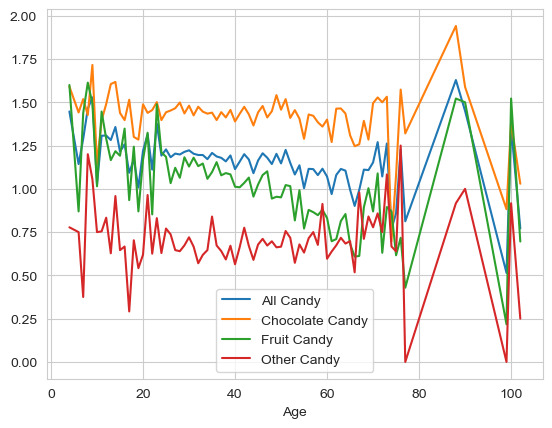

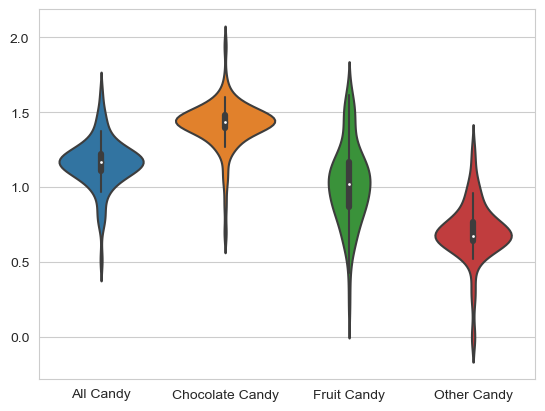

In [82]:
titles = ["All Candy", "Chocolate Candy", "Fruit Candy", "Other Candy"]
candy_by_age = pd.DataFrame()
for i, df in enumerate([all_candy, choc_df, fruit_df, other_df]):
    candy_by_age[titles[i]] = df.loc[:, ~df.columns.isin(['Gender', 'Country'])].groupby('Age').mean().mean(axis=1)

sns.lineplot(data=candy_by_age, dashes=False)
plt.ylabel="Avg Score"
plt.show()

sns.violinplot(data=candy_by_age)
plt.show()

Seems young people like candy more than older people, except for what's likely one outlier in the 80-100 range.

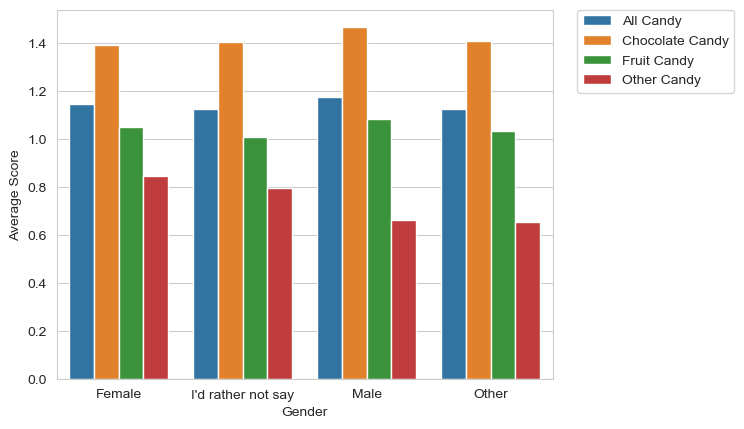

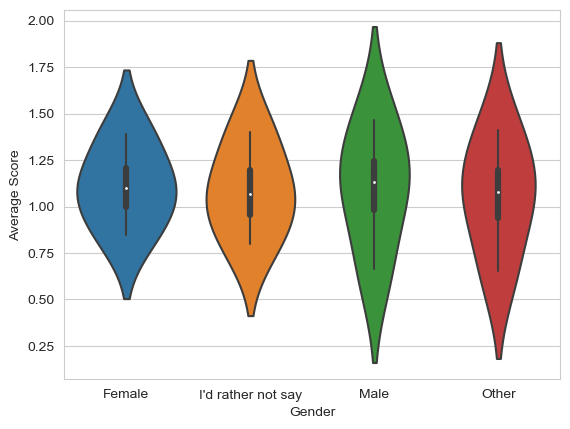

In [94]:
candy_by_gender = pd.DataFrame()
for i, df in enumerate([all_candy, choc_df, fruit_df, other_df]):
    candy_by_gender[titles[i]] = df.loc[:, ~df.columns.isin(['Age', 'Country'])].groupby('Gender').mean().mean(axis=1)
candy_by_gender.reset_index(drop=False, inplace=True)
melted = pd.melt(candy_by_gender, id_vars=['Gender'], var_name='Candy Type', value_name='Average Score')


sns.set_style("whitegrid")
sns.barplot(x="Gender", y="Average Score", hue="Candy Type", data=melted)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

sns.violinplot(x="Gender", y="Average Score", data=melted)
plt.show()

Interestingly, the chart goes against stereotypes. Men like chocolate candy more than women, and in fact rank all candy higher besides non fruit and chocolate candies.

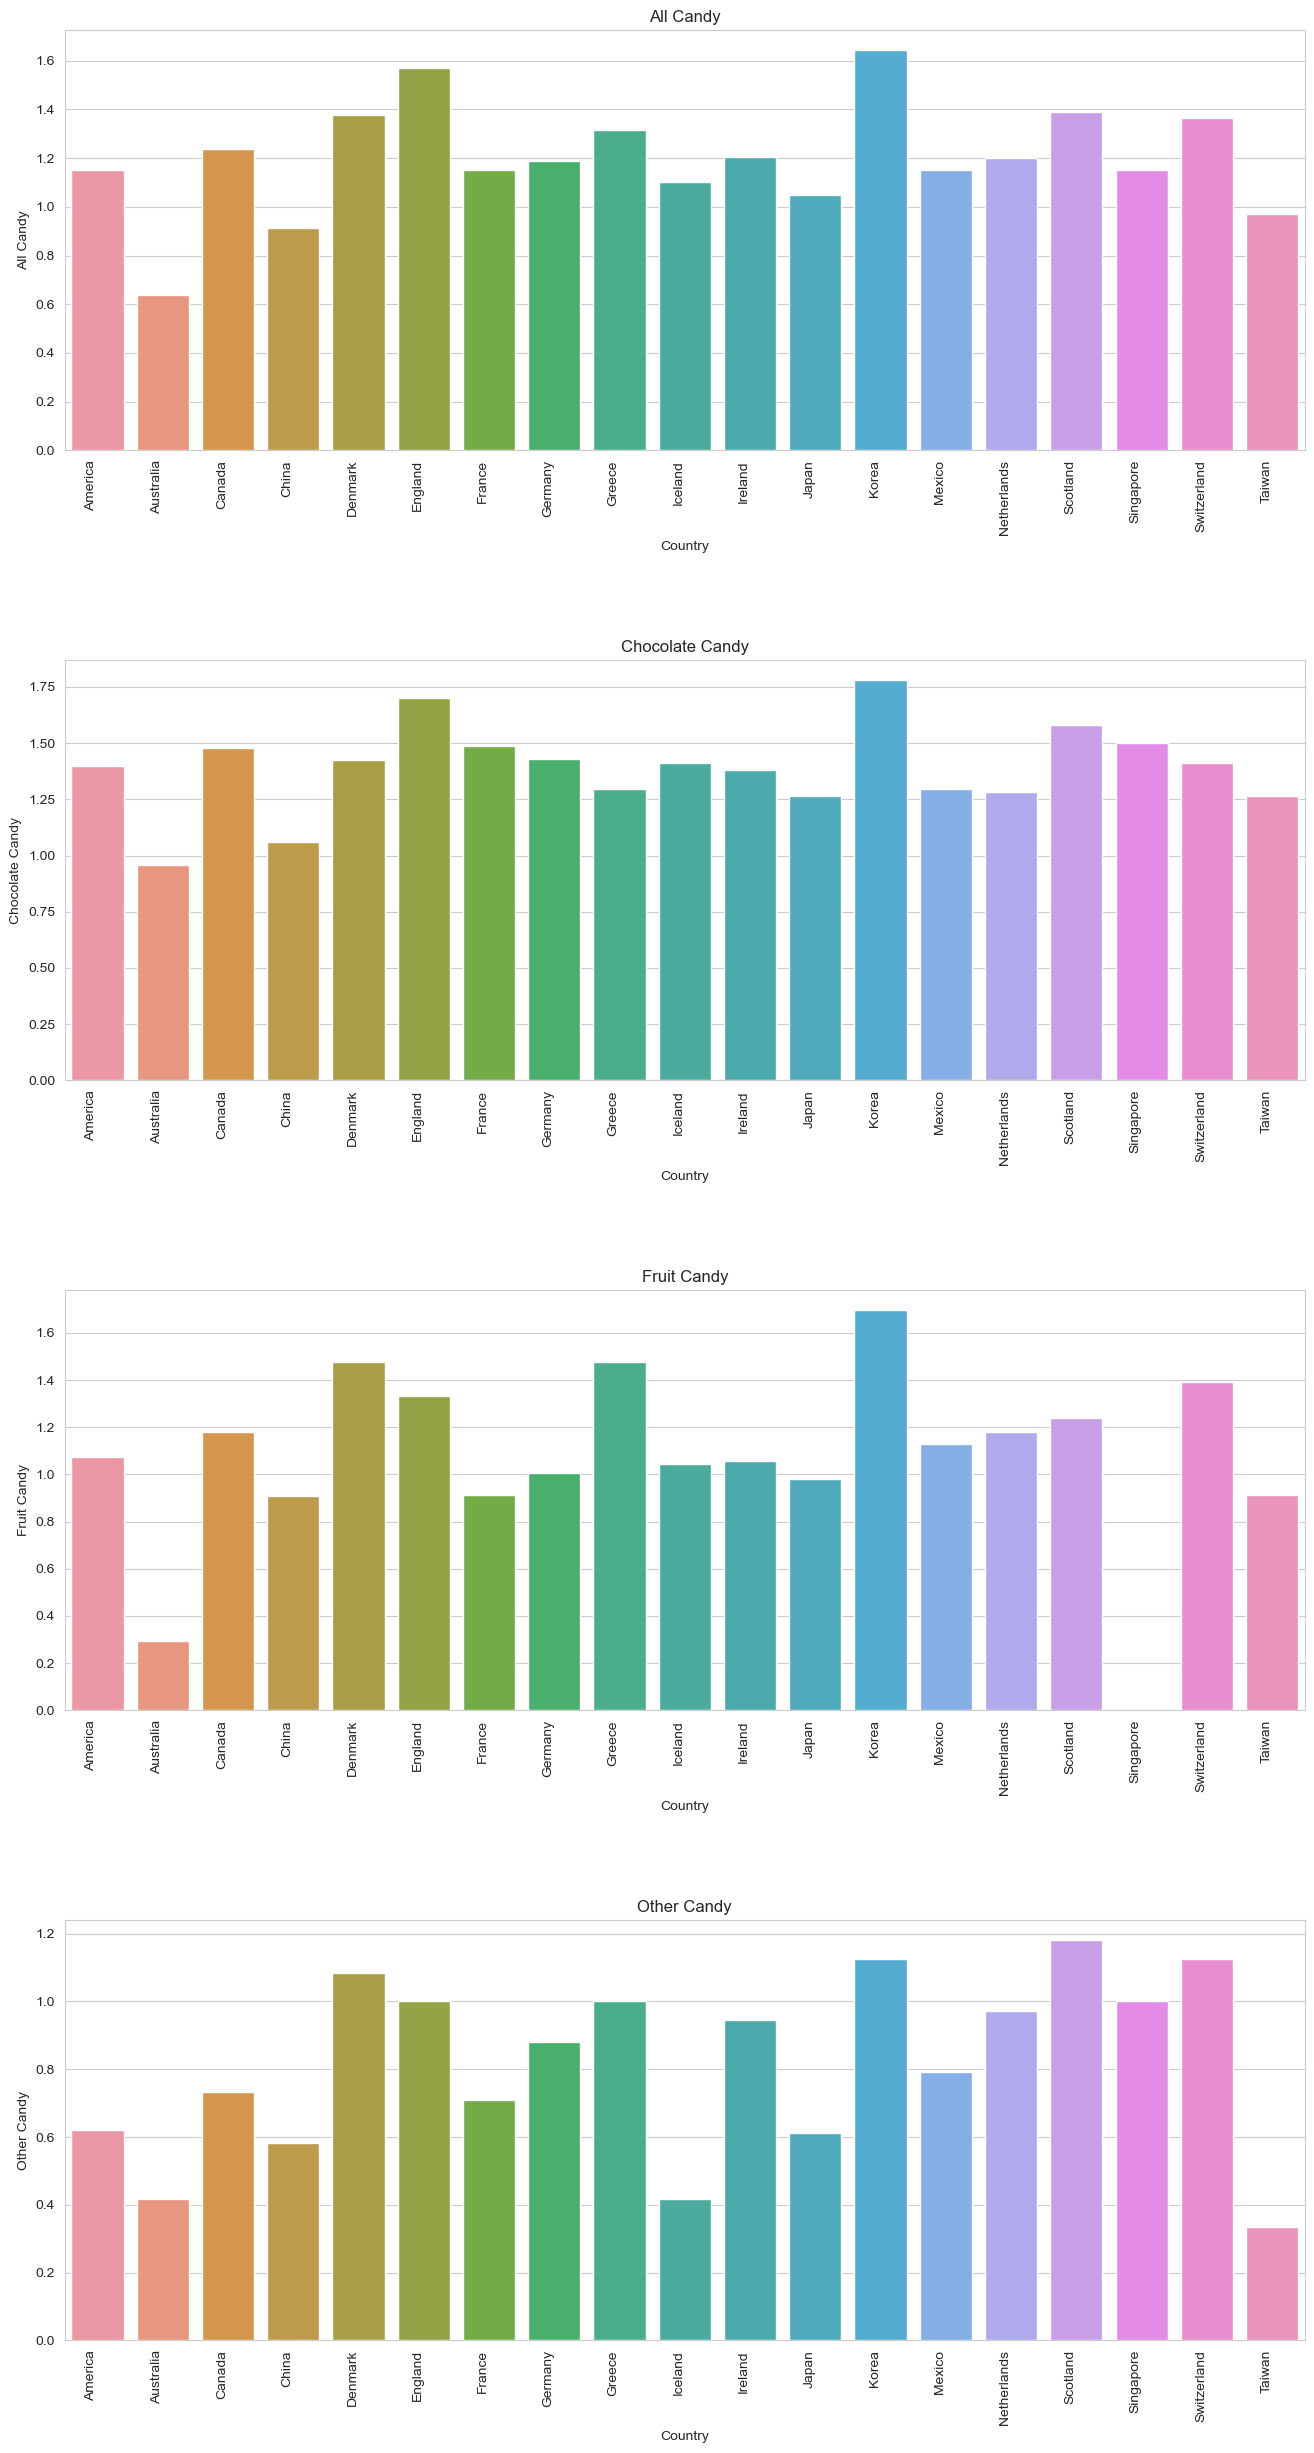

In [84]:
candy_by_country = pd.DataFrame()
for i, df in enumerate([all_candy, choc_df, fruit_df, other_df]):
    candy_by_country[titles[i]] = df.loc[:, ~df.columns.isin(['Age', 'Gender'])].groupby('Country').mean().mean(axis=1)
candy_by_country.reset_index(drop=False, inplace=True)

fig, axs = plt.subplots(4, 1, figsize=(16, 30))
for i, col in enumerate(titles):
    sns.barplot(x="Country", y = candy_by_country[col], data=candy_by_country, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90, ha='right')
    axs[i].set_title(col)
plt.subplots_adjust(hspace=.5)
plt.show()

Korea has the sweetest tooth of any nations surveyed. They like Chocolate and Fruit candies better than other nations, while Scotland seems to really like other flavors in their candy. Australia likes candy the least. Let's check the significance

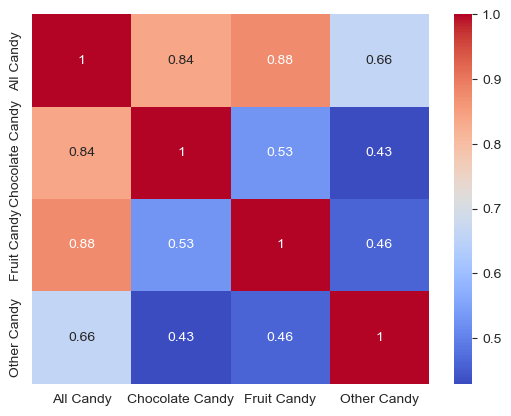

In [85]:
sns.heatmap(candy_by_age.corr(), annot=True, cmap='coolwarm')

plt.show()

Let's find which candies are best at predicting age, gender, and country.

In [86]:
X = all_candy.iloc[:,3:].fillna(0)
age_Y = all_candy.iloc[:,0].fillna(0)
country_Y = le.fit_transform(all_candy['Country'])
gender_Y = le.fit_transform(all_candy['Gender'])


test = SelectKBest(score_func=f_classif, k=4)
age_scores = test.fit(X, age_Y).scores_
country_scores = test.fit(X, country_Y).scores_
gender_scores = test.fit(X, gender_Y).scores_
feature_names = X.columns

age_score_tuples = sorted(list(zip(age_scores, feature_names)), reverse = True)
country_score_tuples= sorted(list(zip(country_scores, feature_names)), reverse = True)
gender_score_tuples= sorted(list(zip(gender_scores, feature_names)), reverse = True)

print("Age predictors:")
for score, feature in age_score_tuples[0:5]:
    print(f"{feature}: {score}")
    
print("\nCountry predictors:")
for score, feature in country_score_tuples[0:10]:
    print(f"{feature}: {score}")
    
print("\nGender predictors:")
for score, feature in gender_score_tuples[0:10]:
    print(f"{feature}: {score}")

Age predictors:
Sourpatch Kids: 6.097476627144355
Nerds: 5.414275484797247
Whatchamacallit Bars: 3.895572754994553
Twix: 2.8445262917445193
Reese's Pieces: 2.5670786621297093

Country predictors:
Maynards: 12.800358458968098
Coffee Crisp: 11.618721104273073
Smarties (Commonwealth): 8.162654479996158
Heath Bar: 7.22400184018134
Fuzzy Peaches: 7.158379904364176
100 Grand Bar: 4.698862261175851
Whatchamacallit Bars: 2.7363468090801715
Mars: 2.509390703628949
Gum From Baseball Cards: 2.3706980569013014
Reese's Peanut Butter Cups: 2.276161114582089

Gender predictors:
Reggie Jackson Bar: 15.359295564089917
Lindt Truffle: 7.395353387490611
100 Grand Bar: 7.140486395887597
Kinder Happy Hippo: 7.035430132929464
Whatchamacallit Bars: 6.671738452772356
Black Jacks: 6.3474251244208775
Tic Tacs: 5.292844304003031
Gummy Bears: 4.6983274670195465
Pixy Stix: 4.10620295164046
Chiclets: 3.694526104206245


We do a principal component analysis, noticing some outliers, but most of the data is clustered into one clear group.

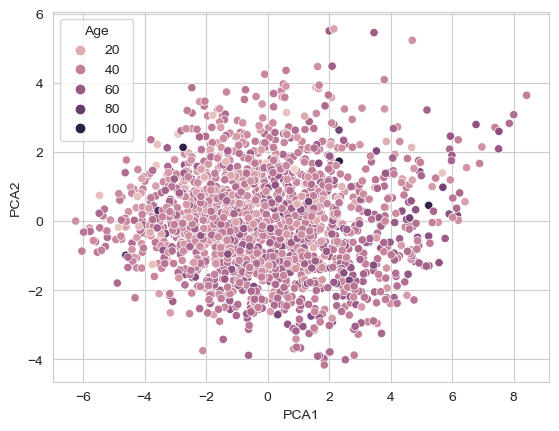

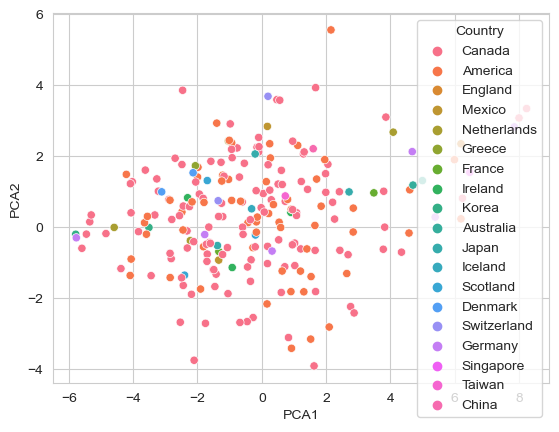

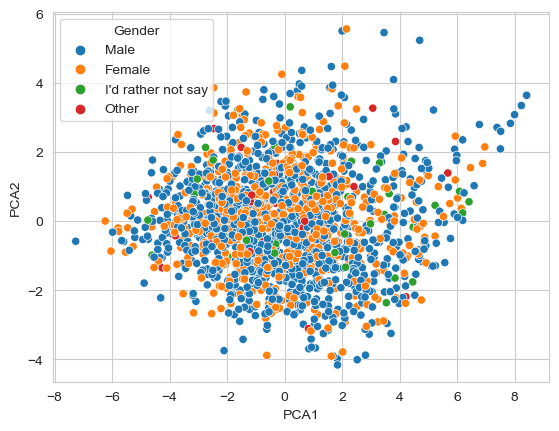

In [87]:
pca = PCA(n_components=2)
candy_pca = pca.fit_transform(all_candy.iloc[:, 3:].fillna(0))

all_candy.loc[:, "PCA1"] = candy_pca[:, 0]
all_candy.loc[:, "PCA2"] = candy_pca[:, 1]

sns.scatterplot(data=all_candy, x="PCA1", y="PCA2", hue="Age")
plt.show()
sns.scatterplot(data=all_candy, x="PCA1", y="PCA2", hue="Country")
plt.show()
sns.scatterplot(data=all_candy, x="PCA1", y="PCA2", hue="Gender")
plt.show()